In [1]:
from tensorflow.keras.datasets import mnist

In [2]:
# MNIST veri setini yüklüyoruz
(x_train, y_train), (x_test, y_test)  = mnist.load_data()

print (x_train.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
(60000, 28, 28)


In [3]:
# x_train, x_test, y_train, y_test içindeki örnek sayısını yazdırma
print("Initial shape or dimensions of x_train", str(x_train.shape))

print ("Number of samples in our training data: " + str(len(x_train)))
print ("Number of labels in our training data: " + str(len(y_train)))
print ("Number of samples in our test data: " + str(len(x_test)))
print ("Number of labels in our test data: " + str(len(y_test)))
print()
print ("Dimensions of x_train:" + str(x_train[0].shape))
print ("Labels in x_train:" + str(y_train.shape))
print()
print ("Dimensions of x_test:" + str(x_test[0].shape))
print ("Labels in y_test:" + str(y_test.shape))

Initial shape or dimensions of x_train (60000, 28, 28)
Number of samples in our training data: 60000
Number of labels in our training data: 60000
Number of samples in our test data: 10000
Number of labels in our test data: 10000

Dimensions of x_train:(28, 28)
Labels in x_train:(60000,)

Dimensions of x_test:(28, 28)
Labels in y_test:(10000,)


In [4]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [5]:
# Veri kümemizden 6 rastgele görüntü görüntülemek için OpenCV'yi kullanın
for i in range(0,6):
    random_num = np.random.randint(0, len(x_train))
    img = x_train[random_num]
    window_name = 'Random Sample #' + str(i)
    cv2_imshow(img)
    cv2.waitKey(0)

cv2.destroyAllWindows()

In [6]:
import matplotlib.pyplot as plt

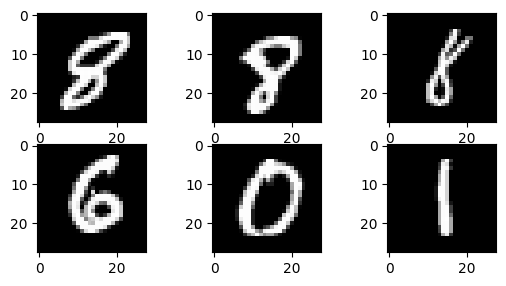

In [7]:

# 6 görüntü çizer, alt planın argümanlarının nrows, ncols,index olduğuna dikkat edin
# görüntü veri setimiz gri tonlamalı olduğundan renk haritasını gri olarak ayarladık

plt.subplot(331)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

plt.subplot(332)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

plt.subplot(333)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

plt.subplot(334)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

plt.subplot(335)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

plt.subplot(336)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))


plt.show()

In [8]:
# Satır ve sütun sayısını saklayalım
img_rows = x_train[0].shape[0]
img_cols = x_train[0].shape[1]

In [9]:
# Randevumuzu Keras için gereken doğru 'şekle' sokmak
# Tarihimize 4. bir boyut daha katarak tarihimizi değiştirmeliyiz.
# (60000,28,28) ile (60000,28,28,1) arasındaki orijinal görüntü şeklimiz
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

In [10]:
# tek bir görüntünün şeklini saklayın
input_shape = (img_rows, img_cols, 1)

In [11]:
# resim tipimizi float32 veri tipi olarak değiştirin
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [ ]:
# Aralığı (0 ila 255) ila (0 ila 1) değiştirerek verilerimizi normalleştirin
x_train /= 255
x_test /= 255

In [13]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [14]:
from tensorflow.keras.utils import to_categorical

In [15]:
# Şimdi hot encode çıkışlarını birleştiririz
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [16]:
#hot encode matrisimizin sayı sütunlarını sayalım
print ("Number of Classes: " + str(y_test.shape[1]))

num_classes = y_test.shape[1]
num_pixels = x_train.shape[1] * x_train.shape[2]

Number of Classes: 10


In [17]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [19]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD

In [20]:
# model oluşturma
model = Sequential()

In [21]:
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.keras.optimizers.SGD(0.01),
              metrics = ['accuracy'])

print(model.summary())

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,179,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,199,882 (4.58 MB)

 Trainable params: 1,199,882 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

None


In [22]:
batch_size = 32
epochs =10

In [23]:
history = model.fit(x_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 190s 101ms/step - accuracy: 0.6922 - loss: 0.9576 - val_accuracy: 0.9380 - val_loss: 0.1936
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 216s 108ms/step - accuracy: 0.9039 - loss: 0.3109 - val_accuracy: 0.9540 - val_loss: 0.1496
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 228s 91ms/step - accuracy: 0.9263 - loss: 0.2460 - val_accuracy: 0.9666 - val_loss: 0.1177
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 169s 90ms/step - accuracy: 0.9416 - loss: 0.1964 - val_accuracy: 0.9720 - val_loss: 0.0920
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 202s 91ms/step - accuracy: 0.9557 - loss: 0.1509 - val_accuracy: 0.9778 - val_loss: 0.0719
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 171s 91ms/step - accuracy: 0.9625 - loss: 0.1294 - val_accuracy: 0.9802 - val_loss: 0.0632
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 201s 91ms/step - accuracy: 0.9668 - loss: 0.1120 - val_accuracy: 0.9814 - val_loss: 0.0551
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 202s 90ms/step - accuracy

In [24]:
# Kayıp tablolarımızı çizmek

In [25]:
import matplotlib.pyplot as plt

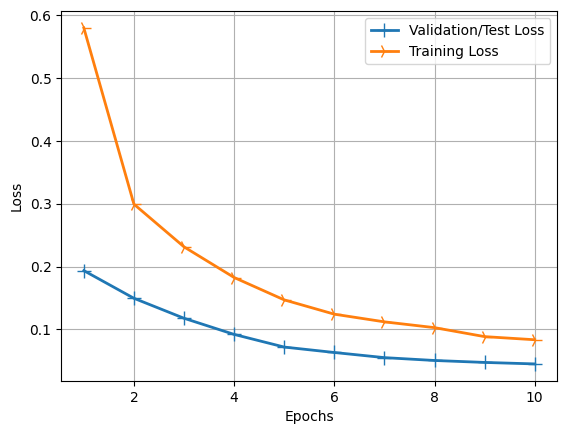

In [26]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

In [27]:
# Doğruluk tablolarımızı çizmek

In [28]:
import matplotlib.pyplot as plt

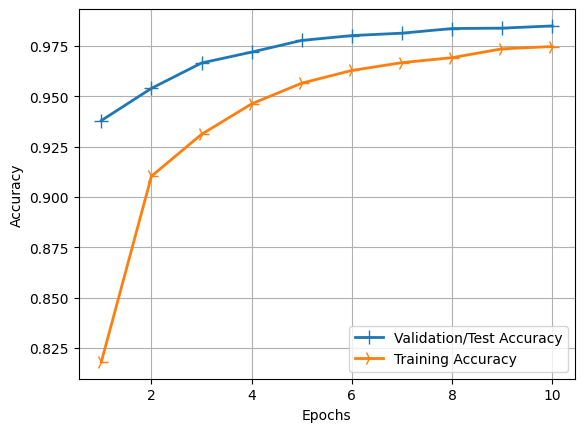

In [29]:
history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

In [30]:
#Modeli kaydediyoruz
model.save("8_mnist_simple_cnn_10_Epochs.h5")
print("Model Saved")

Model Saved


In [31]:
from keras.models import load_model

In [32]:
classifier = load_model('8_mnist_simple_cnn_10_Epochs.h5')

In [33]:
import cv2
import numpy as np

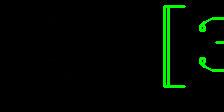

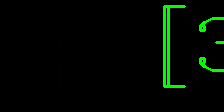

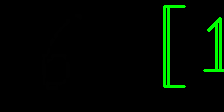

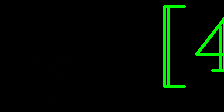

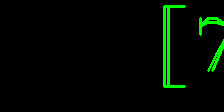

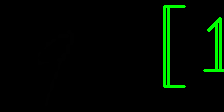

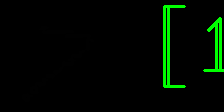

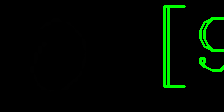

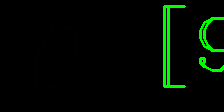

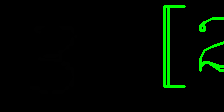

In [34]:
def draw_test(name, pred, input_im):
    BLACK = [0,0,0]
    expanded_image = cv2.copyMakeBorder(input_im, 0, 0, 0, imageL.shape[0] ,cv2.BORDER_CONSTANT,value=BLACK)
    expanded_image = cv2.cvtColor(expanded_image, cv2.COLOR_GRAY2BGR)
    cv2.putText(expanded_image, str(pred), (152, 70) , cv2.FONT_HERSHEY_COMPLEX_SMALL,4, (0,255,0), 2)
    cv2_imshow(expanded_image)


for i in range(0,10):
    rand = np.random.randint(0,len(x_test))
    input_im = x_test[rand]

    imageL = cv2.resize(input_im, None, fx=4, fy=4, interpolation = cv2.INTER_CUBIC)
    input_im = input_im.reshape(1,28,28,1)

    ## Get Prediction
    res = str(classifier.predict(input_im, 1, verbose = 0)[0])

    draw_test("Prediction", res, imageL)
    cv2.waitKey(0)

cv2.destroyAllWindows()

In [35]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD

In [36]:
# Eğitim Parametreleri
batch_size = 128
epochs = 1

In [37]:
#MNIST veri setini yüklüyoruz
(x_train, y_train), (x_test, y_test)  = mnist.load_data()

In [38]:
# Satır ve sütun sayısını saklayalım
img_rows = x_train[0].shape[0]
img_cols = x_train[1].shape[0]

In [39]:
# Randevumuzu Keras için gereken doğru 'şekle' sokmak
# Tarihimize 4. bir boyut daha katarak tarihimizi değiştirmeliyiz.
# (60000,28,28) ile (60000,28,28,1) arasındaki orijinal görüntü şeklimiz
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

In [40]:
# tek bir görüntünün şeklini saklayın
input_shape = (img_rows, img_cols, 1)


In [41]:
# tek bir görüntünün şeklini saklayın
input_shape = (img_rows, img_cols, 1)

In [42]:
# resim tipimizi float32 veri tipi olarak değiştirin
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [43]:
# Aralığı (0 ila 255) ila (0 ila 1) değiştirerek verilerimizi normalleştirin
x_train /= 255
x_test /= 255

In [44]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [45]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [46]:
print ("Number of Classes: " + str(y_test.shape[1]))

Number of Classes: 10


In [47]:
num_classes = y_test.shape[1]
num_pixels = x_train.shape[1] * x_train.shape[2]

In [48]:
#Model Oluşturma
model = Sequential()

In [49]:
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss = 'categorical_crossentropy',
              optimizer = SGD(0.01),
              metrics = ['accuracy'])

print(model.summary())

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       1,179,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,199,882 (4.58 MB)

 Trainable params: 1,199,882 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

None
469/469 ━━━━━━━━━━━━━━━━━━━━ 157s 332ms/step - accuracy: 0.4419 - loss: 1.6794 - val_accuracy: 0.9076 - val_loss: 0.3184
Test loss: 0.3184226453304291
Test accuracy: 0.9075999855995178


In [50]:
#modelimizi görselleştirme
%matplotlib inline
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD

In [51]:
input_shape = (28,28,1)
num_classes = 10

In [52]:
model = Sequential()

In [53]:
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss = 'categorical_crossentropy',
              optimizer = SGD(0.01),
              metrics = ['accuracy'])

print(model.summary())

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       1,179,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,199,882 (4.58 MB)

 Trainable params: 1,199,882 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

None


In [54]:
# Model mimarisinin diyagramını oluşturma

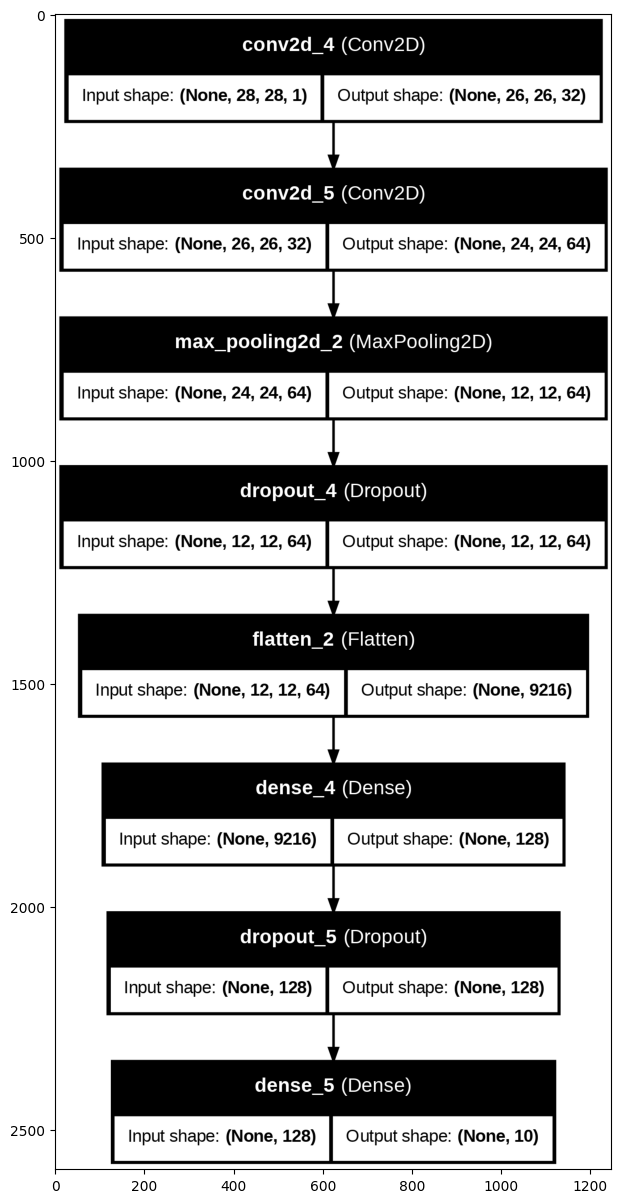

In [55]:
# Konuyu oluştur
plot_model(model, to_file = 'model_plot.png',
           show_shapes = True,
           show_layer_names = True)
# Çizimi burada göster
img = mpimg.imread('model_plot.png')
plt.figure(figsize=(30,15))
imgplot = plt.imshow(img)